# Mean Squared Logarithmic Error

## Fórmula del MSLE

Partiendo de que la expresión:  
$$log(y_i+1) − log(y`_i+1)$$

También puede ser escrita así:  
$$log((y_i+1) / (y'_i+1))$$

![Imagen](https://cdn-images-1.medium.com/max/800/1*VjNfaSRuj3FIMcKA0yJAGg.png)

## Mecanismo:

El _Error Logarítmico Cuadrático Medio_ es solo un _Error Cuadrático Medio_ calculado en escala __logarítmica__. De hecho, para calcularlo tomamos un logaritmo de nuestras predicciones y los valores objetivo, y calculamos el _Error Cuadrático Medio_ entre ellos.

Los objetivos generalmente no son negativos pero pueden ser iguales a 0, y el __logaritmo de 0 no está definido__ (tiende a -∞). Por tanto se agrega una __constante__ a las predicciones y los objetivos antes de aplicar la operación logarítmica. Lo normal es que esta __constante__ se defina como 1, pero también se puede definir para que sea diferente según el problema que queramos resolver.

Esta métrica se usa generalmente en la misma situación que el _Error de Porcentaje Cuadrático Medio_ (MSPE) y el _Error Porcentual Absoluto Medio_ (MAPE), ya que también conlleva errores relativos más que errores absolutos.

### Cuándo es MSLE preferible:

* Cuando los objetivos __crecen exponencialmente__ (por ejemplo, haciendo un conteo de población)
* Cuando nos interesa más el __porcentaje de error__ que el valor absoluto de error.
* Cuando hay un gran __rango de valores__ en las variables objetivo y __NO queremos penalizar grandes diferencias__ cuando los valores predichos y reales son números grandes.
* Cuando se quiere __penalizar infraestimaciones__ en vez de sobreestimaciones.

### Ejemplo 1:
1. __Caso-1:__ Predicción = 30, Actual = 40

2. __Caso-2:__ Prediccion = 300, Actual = 400


* Con el Error Cuadrático Medio el __Caso-2__ es puntuado como __10 veces más__ que el __Caso-1__.  
* En cambio, con el Error Logarítmico Cuadrático Medio los 2 casos son __puntuados igual__.  
* El Error Logarítmico Cuadrático Medio tiene en cuenta el __Ratio de Cambio__.

### Ejemplo 2:

3. __Caso-3:__
    * Predicción = 600, Actual = 1000, Diferencia = 400
    * __RMSE__ = 400, __RMSLogE__ = 0.5108  

4. __Caso-4:__
    * Predicción = 1400 , Actual = 1000, Diferencia = 400)
    * __RMSE__ = 400, __RMSLogE__ = 0.3365

* Cuando las diferencias son las mismas entre los valores predichos y reales:
    * El Error Cuadrático Medio las trata de la __misma forma__ en ambos casos
    * Sin embargo el Error Logaritmico Cuadrático Medio __penaliza la baja estimación__ mas que la sobreestimación.





* A menudo, penalizar una baja estimacion mas que una sobreestimacion es importante a la hora de predicciones sobre ventas y demandas de inventario.

* Sería preferible tener inventario extra a no ser capaz de proveer un producto tanto como se demanda.

---
## Demo

Imports

In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

Preparación de datos

In [2]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=413)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

MSLE

In [3]:
# define model
model_msle = Sequential()
model_msle.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model_msle.add(Dense(1, activation='linear'))
model_msle.compile(loss='mean_squared_logarithmic_error', metrics=['msle'])

# fit model
history_msle = model_msle.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

MSE

In [4]:
# define model
model_mse = Sequential()
model_mse.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model_mse.add(Dense(1, activation='linear'))
model_mse.compile(loss='mean_squared_error', metrics=['mse'])

# fit model
history_mse = model_mse.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

MAE

In [5]:
# define model
model_mae = Sequential()
model_mae.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model_mae.add(Dense(1, activation='linear'))
model_mae.compile(loss='mean_absolute_error', metrics=['mae'])

# fit model
history_mae = model_mae.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

Visualización

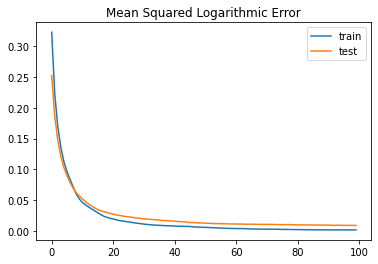

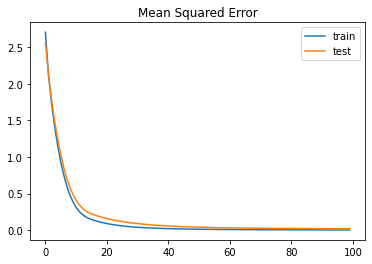

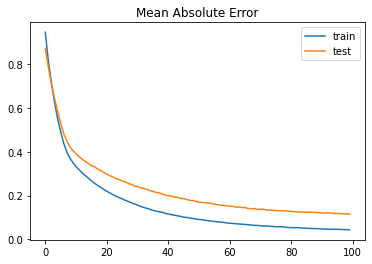

In [6]:
# plot loss during training
pyplot.title("Mean Squared Logarithmic Error")
pyplot.plot(history_msle.history['loss'], label='train')
pyplot.plot(history_msle.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# plot loss during training
pyplot.title("Mean Squared Error")
pyplot.plot(history_mse.history['loss'], label='train')
pyplot.plot(history_mse.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# plot loss during training
pyplot.title("Mean Absolute Error")
pyplot.plot(history_mae.history['loss'], label='train')
pyplot.plot(history_mae.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

---
URLs:
* [Towards Data Science](https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7#5185)

* [HRNGOK](https://hrngok.github.io/posts/metrics/)

* [Sitio Big Data](https://sitiobigdata.com/2019/05/27/modelos-de-machine-learning-metricas-de-regresion-mse-parte-2/)